In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [2]:
ad = pd.read_csv(r"C:\5 Machine Learning\ML\adultKNN.csv")

In [3]:
ad.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
ad.shape

(48842, 15)

In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
ad.income.replace({'<=50K':0,'>50K':1},inplace=True)

In [7]:
ad.loc[:,(ad=='?').any()].columns           # to extract columns having spl character here its ?

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [8]:
ad.workclass = ad.workclass.replace({'?': 'Private'})
ad.occupation = ad.occupation.replace({'?':'Other-service'})

In [9]:
ad['native-country']= ad['native-country'].replace({'?':'United-States'})   

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
ad[ad.select_dtypes(include=['object']).columns]= ad[ad.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
ad_train, ad_test= train_test_split(ad, test_size=0.25)

In [15]:
ad_train_x= ad_train.iloc[:,0:-1]
ad_train_y= ad_train.iloc[:,-1]
ad_test_x = ad_test.iloc[:,0:-1]
ad_test_y = ad_test.iloc[:,-1]

# K-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knc = KNeighborsClassifier(n_neighbors=18)        

In [47]:
knc.fit(ad_train_x, ad_train_y)

KNeighborsClassifier(n_neighbors=18)

In [48]:
pred_test_y = knc.predict(ad_test_x)

In [49]:
pred_test_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm= confusion_matrix(ad_test_y,pred_test_y)
cm

array([[9134,  161],
       [2276,  640]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(ad_test_y,pred_test_y)

0.8004258455490951

In [25]:
#to find accurate value of k by ploting graph of accuracy vs stability

In [26]:
acc=[]

for k in range(1,51):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(ad_train_x, ad_train_y)
    pred_test_y = knc.predict(ad_test_x)
    cm =confusion_matrix(ad_test_y,pred_test_y)
    acc.append(cm.diagonal().sum()*100/ cm.sum())

In [27]:
k_values = list(range(1,51))

In [28]:
import matplotlib.pyplot as plt

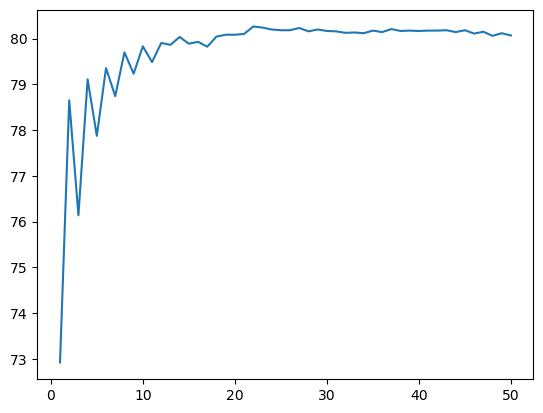

In [29]:
plt.plot(k_values, acc)

here around k=18 graph aquires stability. so we will consider that value to get best accuaracy.

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(criterion='gini', max_depth= 20, min_samples_split= 10,n_estimators=24)

In [56]:
rfc.fit(ad_train_x, ad_train_y)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=24)

In [58]:
pred =rfc.predict(ad_test_x)

In [59]:
confusion_matrix(ad_test_y,pred)

array([[8713,  582],
       [1145, 1771]], dtype=int64)

In [61]:
accuracy_score(ad_test_y,pred)

0.8585701416755385

hyperparameter tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
search_dict= {'criterion': ['gini','entropy'], 'max_depth':range(10,25), 'min_samples_split':range(5,15), 'n_estimators':range(15,30)}

In [64]:
grid = GridSearchCV(rfc, param_grid = search_dict)

In [ ]:
grid.fit(ad_train_x, ad_train_y)

In [ ]:
grid.best_params_

In [ ]:
rfc1 = RandomForestClassifier(criterion='gini', max_depth= 20, min_samples_split= 10,n_estimators=24)

In [ ]:
rfc1.fit(ad_train_x, ad_train_y)